#Training Models

## Regression Models

### Linear Regression

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
from numpy.random import RandomState
np.random.seed(42)
x = 2*np.random.rand(100,1)
y = 4 + 3*x + np.random.randn(100,1)

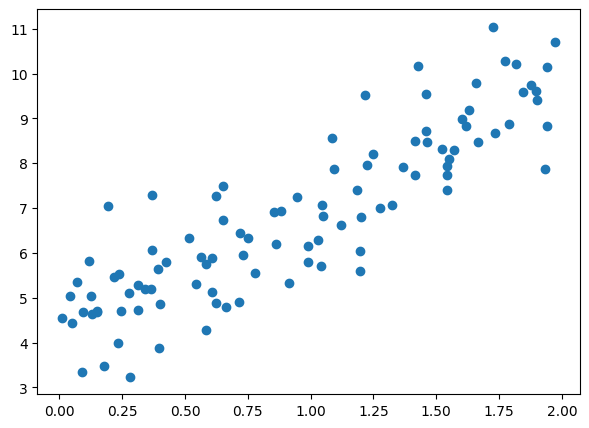

In [ ]:
from matplotlib.backend_bases import rcParams
rcParams['figure.figsize']=7,5
plt.scatter(x,y)

In [ ]:
x_b = np.c_[np.ones((100, 1)), x] # add x0 = 1 to each instance 
theta_best = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)

In [ ]:
theta_best

array([[4.21509616],
       [2.77011339]])

In [ ]:
x_new = np.array([[0], [2]])
x_new_b = np.c_[np.ones((2, 1)), x_new] # add x0 = 1 to each instance
y_predict = x_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [9.75532293]])

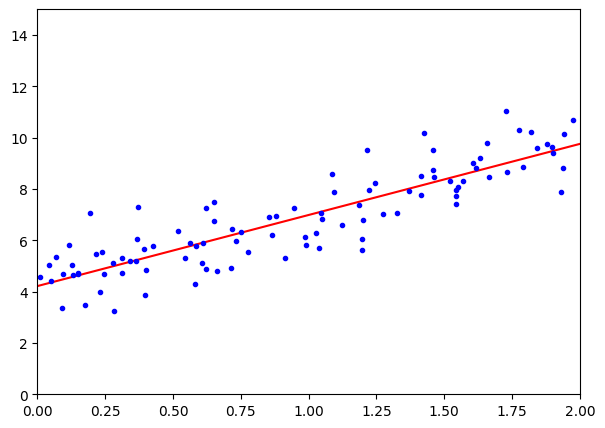

In [ ]:
plt.plot(x_new, y_predict, "r-")
plt.plot(x, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression 
lin_reg = LinearRegression()
lin_reg.fit(x, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [ ]:
lin_reg.predict(x_new)

array([[4.21509616],
       [9.75532293]])

#### Gradient Descent

The general idea of Gradient Descent is to tweak parameters iteratively in order to minimize a cost function.

### Polynomial Regression


In [ ]:
m = 100
x = 6*np.random.rand(m,1)-3
y = 0.5*x**2 + x+2 + np.random.randn(m,1)

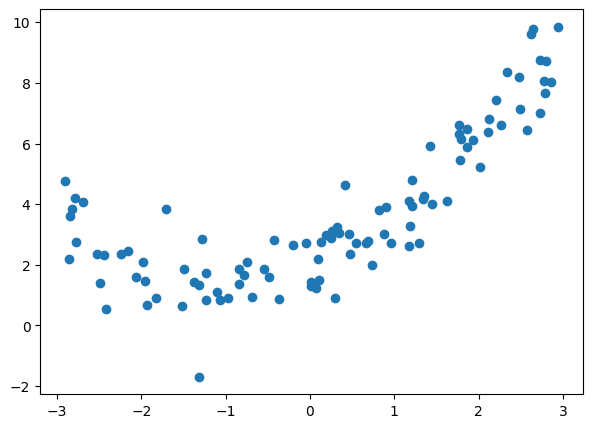

In [ ]:
plt.scatter(x,y)

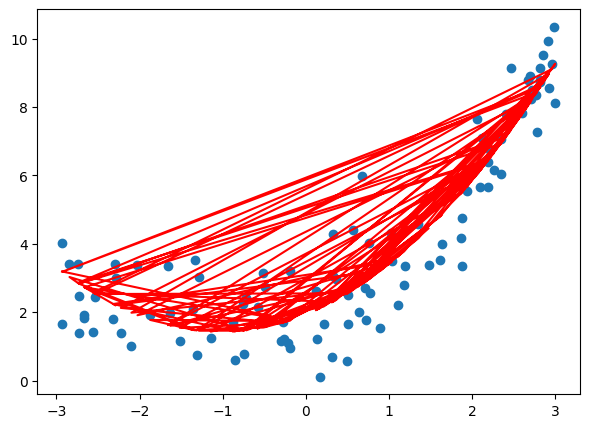

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Generate data
m = 100
x = 6*np.random.rand(m,1)-3
y = 0.5*x**2 + x+2 + np.random.randn(m,1)

# Fit polynomial regression model
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x)
model = LinearRegression()
model.fit(x_poly, y)

#plot
plt.scatter(x,y)
plt.plot(x,model.predict(x_poly), color='red')


**The reason why the original code generates multiple curves is that the code is plotting the polynomial regression line for every iteration of the loop. The loop is running for each degree of the polynomial regression line, which is causing multiple lines to be plotted.**


**Here is the Correction**


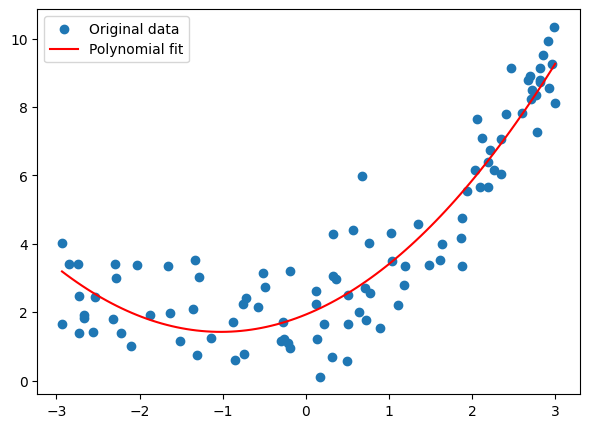

In [ ]:
# Predict y values using model
x_fit = np.linspace(x.min(), x.max(), 100).reshape(-1,1)
x_fit_poly = poly.transform(x_fit)
y_fit = model.predict(x_fit_poly)

# Plot results
plt.scatter(x, y, label='Original data')
plt.plot(x_fit, y_fit, color='red', label='Polynomial fit')
plt.legend()
plt.show()


In [ ]:
model.intercept_

array([1.9326696])

In [ ]:
model.coef_

array([[0.        , 0.99165946, 0.48476612]])

## Classification Models

### Logistic Regression

We will use Iris Dataset for this part

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()

In [ ]:
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [ ]:
x_iris = iris['data'][:,3:]
y_iris = (iris['target'] ==2).astype(int)
pd.DataFrame(y_iris)

,0
0,0
1,0
2,0
3,0
4,0
...,...
145,1
146,1
147,1
148,1


In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_iris, y_iris)

LogisticRegression()

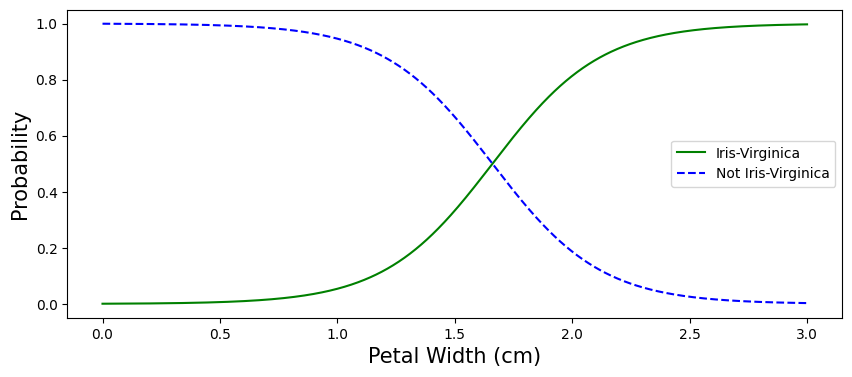

In [ ]:
x_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(x_new)

plt.figure(figsize=(10,4))
plt.plot(x_new, y_proba[:,1],'g-',label = 'Iris-Virginica')
plt.plot(x_new,y_proba[:,0], 'b--', label = "Not Iris-Virginica" )
plt.xlabel('Petal Width (cm)', fontsize = 15)
plt.ylabel('Probability', fontsize=15)
plt.legend(loc=5)

# Regularization and OverFitting 

## Learning Curves (For Over Fitting Detection)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

It uses the train_test_split function from scikit-learn to split the data into a training set and a validation set, and then loops over increasing sizes of the training set to train the model and calculate the training and validation errors.

In [ ]:
def plot_learning_curves(model,x,y):
  x_train,x_val , y_train, y_val = train_test_split(x,y,test_size=0.2)
  train_errors , val_errors = [],[]
  for m in range(1,len(x_train)):
    model.fit(x_train[:m], y_train[:m])
    y_train_predict = model.predict(x_train[:m])
    y_val_predict = model.predict(x_val)
    train_errors.append(mean_squared_error(y_train[:m],y_train_predict))
    val_errors.append(mean_squared_error(y_val,y_val_predict))
  plt.plot(np.sqrt(train_errors),'r-+',linewidth=2, label= 'train')
  plt.plot(np.sqrt(val_errors),'b-',linewidth=2, label= 'val')
  plt.legend()

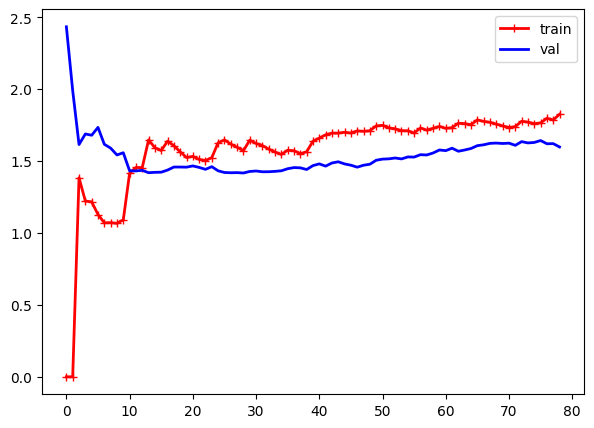

In [ ]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, x,y)

**These learning curves are typical of an underfitting model. Both curves have reached a plateau; they are close and fairly high.**

### Learning Curve by ChatGPT

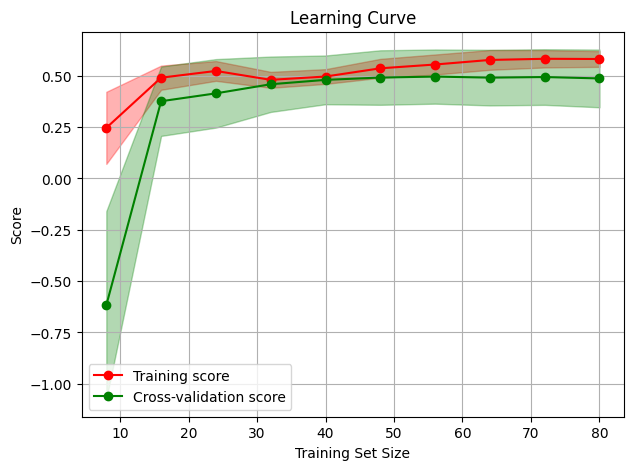

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LinearRegression

# Define the training set sizes to use
train_sizes = np.linspace(0.1, 1.0, 10)

# Calculate the learning curve
train_sizes, train_scores, validation_scores = learning_curve(
    model, x, y, train_sizes=train_sizes, cv=5)

# Calculate the mean and standard deviation of the training and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
validation_scores_mean = np.mean(validation_scores, axis=1)
validation_scores_std = np.std(validation_scores, axis=1)

# Plot the learning curve
plt.figure()
plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("Score")
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.3, color="r")
plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std, validation_scores_mean + validation_scores_std, alpha=0.3, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, validation_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.legend(loc="best")
plt.show()


## Regularization (Linear Models)

**A good way to reduce overfitting is to regularize the model (i.e., to constrain it): the fewer degrees of freedom it has, the harder it will be for it to overfit the data.** 

For example, **a simple way to regularize a polynomial model is to reduce the number of polynomial degrees.**

For a linear model, regularization is typically achieved by constraining the weights of the model. We will now look at Ridge Regression, Lasso Regression, and Elastic Net, which implement three different ways to constrain the weights.


### Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
ridge_reg = Ridge(alpha = 1, solver = 'cholesky')
ridge_reg.fit(x,y)

Ridge(alpha=1, solver='cholesky')

In [ ]:
ridge_reg.predict([[1.5]])

array([[5.27563224]])

## Early Stopping

In [ ]:
#ChatGPT
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a pipeline for the Ridge regression model
model = make_pipeline(Ridge(alpha=1.0))

# Set the maximum number of epochs and the minimum improvement threshold
max_epochs = 100
min_delta = 0.001

# Initialize variables for tracking the best model and its validation score
best_score = float('inf')
best_model = None

# Train the model with early stopping
for epoch in range(max_epochs):
    model.fit(X_train_scaled, y_train)
    score = model.score(X_test_scaled, y_test)
    print(f'Epoch {epoch+1}: Validation score={score:.3f}')
    
    # Check if the validation score has improved by at least the minimum threshold
    if score < best_score - min_delta:
        best_score = score
        best_model = model
    else:
        print(f'Validation score did not improve by more than {min_delta}. Stopping early.')
        break

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test_scaled)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)


Epoch 1: Validation score=0.444
Epoch 2: Validation score=0.444
Validation score did not improve by more than 0.001. Stopping early.
Mean Squared Error: 3.6793791911378726
